<a href="https://colab.research.google.com/github/alvarofpinheiro/pifwia_som/blob/main/PIFWIA_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um mapa auto-organizável (SOM) é uma técnica de aprendizado de máquina não supervisionada usada para produzir uma representação de baixa dimensão (tipicamente bidimensional) de um conjunto de dados de dimensão superior, preservando a estrutura topológica do dados. Por exemplo, um conjunto de dados com p variáveis ​​medidas em n observações pode ser representado como agrupamentos de observações com valores semelhantes para as variáveis. Esses agrupamentos podem então ser visualizados como um "mapa" bidimensional, de modo que as observações em agrupamentos proximais tenham valores mais semelhantes do que as observações em agrupamentos distais. Isso pode facilitar a visualização e a análise de dados de alta dimensão.

Kohonen, T.; Honkela, T. Kohonen Network. Teuvo Kohonen and Timo Honkela (2007), Scholarpedia, 2(1):1568. https://doi.org/10.4249/scholarpedia.1568, 2007.

In [ ]:
#SOM
import math
import random
import matplotlib.pyplot as plt

In [ ]:
#Parametros
NUMERO_NODES = 128

In [ ]:
#Representaçao em 2D, logo o número de nodes será NUMERO_NODES^2
DIMENSAO = 3
RAIO_INICIAL = NUMERO_NODES/2
ITERACOES = 200
TAXA_APRENDIZADO = 0.2

In [ ]:
#Treinamento
inputs = [[0,0,0],
          [0,0,1],
          [1,1,0],
          [1,1,1]]

In [ ]:
#Classes
class node:
  def __init__(self, pesos):
    self.pesos = []
    for i in pesos:
      self.pesos.append(i)
  
  def distancia(self, pesos):
    distancia = 0
    for index, i in enumerate(pesos):
      distancia += (i - self.pesos[index])**2
    return math.sqrt(distancia)

def dist_nodes(node1, node2):
  aux = 0
  aux += (node1[0] - node2[0])**2
  aux += (node1[1] - node2[1])**2
  return math.sqrt(aux)

def melhor_posicao(weights, input):
  best = [0, 0]
  best_dist = 999999999999
  for index_i, i in enumerate(weights):
    for index_j, j in enumerate(i):
      node_dist = j.distancia(input)
      if node_dist < best_dist:
        best_dist = node_dist
        best = [index_i, index_j]
  return best + [best_dist]

def raio(iteracao_atual):
  return RAIO_INICIAL*math.exp(-(iteracao_atual/(ITERACOES/math.log(RAIO_INICIAL))))

def aprendizado(iteracao_atual):
  return TAXA_APRENDIZADO*math.exp(-(iteracao_atual/(ITERACOES/math.exp(TAXA_APRENDIZADO))))

In [ ]:
#Execução
nodes = []
for i in range(NUMERO_NODES):
  node_line = []
  for j in range(NUMERO_NODES):
    node_weight = []
    for k in range(DIMENSAO):
      node_weight.append(random.random())
    node_line.append(node(node_weight))
  nodes.append(node_line)

for iteracao in range(ITERACOES):
  input = random.sample(inputs, 1)[0]

  best_atual = melhor_posicao(nodes, input)
  raio_atual = raio(iteracao)
  aprendizado_atual = aprendizado(iteracao)

  for i in range(NUMERO_NODES):
    for j in range(NUMERO_NODES):
      distancia = dist_nodes(best_atual[:2], [i,j])
      if distancia < raio_atual:
        taxa_de_proximidade = math.exp(-(distancia**2 / (2*(raio_atual**2))))
        for index, k in enumerate(input):
          aux = aprendizado_atual * taxa_de_proximidade * (k - nodes[i][j].pesos[index])
          nodes[i][j].pesos[index] += aux

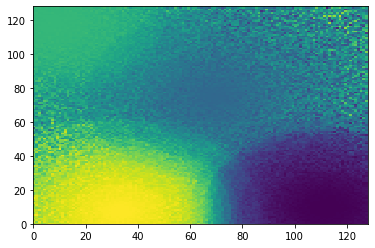

In [ ]:
#Visualização
lista = []
for i in range(NUMERO_NODES):
  node_line = []
  for j in range(NUMERO_NODES):
    node_line.append(sum(nodes[i][j].pesos))
  lista.append(node_line)

plt.pcolormesh(lista)

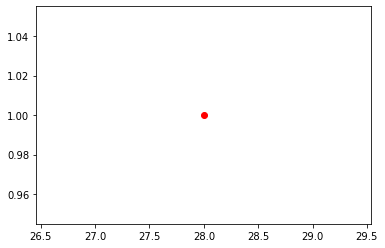

In [ ]:
#Avaliação

novo_input = [0.8, 0.8, 0.8]
best_novo_input = melhor_posicao(nodes, novo_input)
plt.plot(best_novo_input[0], best_novo_input[1], 'ro')

plt.show()